# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Jarred Gastreich
https://github.com/jarjarredred/web-scraping


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [21]:
#imports

%pip install spacy

%pip install spacytextblob

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


!pip list

print('All prereqs installed.')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.4.26
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.2
comtypes                  1.4.11
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem      

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [22]:
# Request the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

#Save as pkl
with open('webpage.pkl', 'wb') as f:
    pickle.dump(response.text, f)

print('Webpage saved as webpage.pkl')

Webpage saved as webpage.pkl


### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [23]:
from bs4 import BeautifulSoup

# Read webpage from pkl
with open('webpage.pkl', 'rb') as f:
    webpage = pickle.load(f)

# Parse the webpage
soup = BeautifulSoup(webpage, 'html.parser')

# Extract the text
text = soup.get_text()
# Print text
print(text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [24]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
!python -m spacy download en_core_web_sm

# Load spacy and add spacytextblob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")
doc = nlp(text)

# Extract tokens, convert to lowercase and filter out unwanted items
tokens = []
for token in doc:
    # Skip punctuation
    if not token.is_punct and not token.is_stop and not token.is_space and token.text.strip():
        tokens.append(token.text.lower())

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

print("5 Most Frequent Tokens:")
print("-" * 30)
for i, (token, freq) in enumerate(most_common_tokens, 1):
    print(f"{i}. '{token}' - appears {freq} times")

print(f"\nTotal unique tokens analyzed: {len(token_freq)}")
print(f"Total tokens processed: {len(tokens)}")


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 7.0 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 10.0 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 11.1 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 11.6 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 11.9 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 11.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
5 Most Frequent Tokens:
------------------------------
1. 'comment' - appears 136 times
2. 'march' - appears 133 times
3. '2021' - appears 133 times
4. 'says' - appears 132 times
5. 'report' - appears 130 times

Total unique tokens analyzed: 2276
Total tokens processe

### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [25]:
# Extract lemmas, convert to lowercase, filter out unwanted items
lemmas = []
for token in doc:
    # Skip punctuation, stopwords, and whitespace
    if not token.is_punct and not token.is_stop and not token.is_space and token.text.strip():
        lemmas.append(token.lemma_.lower())

# Count lemma freq
lemma_freq = Counter(lemmas)

# Get the most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

print("5 Most Frequent Lemmas:")
print("-" * 30)
for i, (lemma, freq) in enumerate(most_common_lemmas, 1):
    print(f"{i}. '{lemma}' - appears {freq} times")

print(f"\nTotal unique lemmas analyzed: {len(lemma_freq)}")
print(f"Total lemmas processed: {len(lemmas)}")

5 Most Frequent Lemmas:
------------------------------
1. 'comment' - appears 157 times
2. 'say' - appears 134 times
3. 'march' - appears 133 times
4. '2021' - appears 133 times
5. 'report' - appears 130 times

Total unique lemmas analyzed: 2008
Total lemmas processed: 5888


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [26]:
#Define the scoring functions
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence.
    """
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not tokens:
        return 0
    score = sum(token in interesting_tokens for token in tokens) / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    """
    doc = nlp(sentence)
    tokens = [token for token in doc if not token.is_punct and not token.is_space]
    if not tokens:
        return 0
    score = sum(token.lemma_.lower() in interesting_lemmas for token in tokens) / len(tokens)
    return score

# Load article text
with open("webpage.pkl", "rb") as file:
    webpage = pickle.load(file)

# Process article text
doc = nlp(webpage)

# Get sentences
sentences = list(doc.sents)
first_sentence = str(sentences[0])  # For testing

# Get frequent tokens and lemmas from earlier analysis
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

top_tokens = [t for t, _ in Counter(tokens).most_common(5)]
top_lemmas = [l for l, _ in Counter(lemmas).most_common(5)]
# Test the scoring functions
# Test the first sentence
token_score = score_sentence_by_token(first_sentence, top_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, top_lemmas)

print("First Sentence:", first_sentence)
print("Token Score:", token_score)
print("Lemma Score:", lemma_score)

First Sentence: <!DOCTYPE html>
<html itemscope="itemscope" itemtype="http://schema.org/Article" lang="en-US">
<head><script type="text/javascript" src="https://web-static.archive.org/_static/js/bundle-playback.js?v=1B2M2Y8A" charset="utf-8"></script>
<script type="text/javascript" src="https://web-static.archive.org/_static/js/wombat.js?v=1B2M2Y8A" charset="utf-8"></script>
<script>window.
Token Score: 0.2702702702702703
Lemma Score: 0.2702702702702703


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

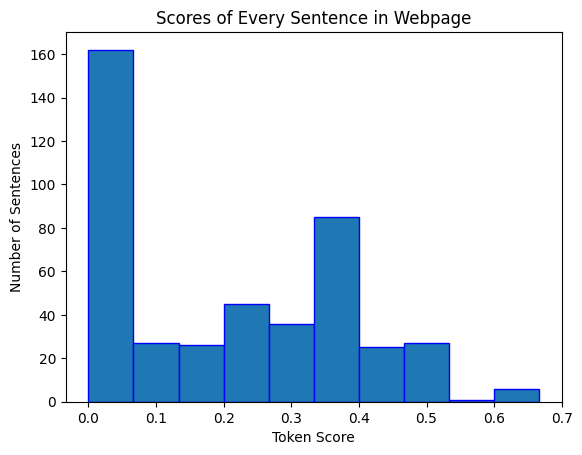

In [27]:
# Get the most common tokens
tokens = [token.text.lower() for token in nlp(webpage)
          if not token.is_stop and not token.is_punct and not token.is_space]
token_counts = Counter(tokens)
most_common_tokens = {token for token, _ in token_counts.most_common(5)}

# Function to score sentences by token
def score_by_token(sentence, interesting_tokens):
    words = [token.text.lower() for token in sentence
             if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    matches = sum(1 for word in words if word in interesting_tokens)
    return matches / len(words)

# Score every sentence
doc = nlp(webpage)
sentence_scores = [score_by_token(sent, most_common_tokens) for sent in doc.sents]

# Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='blue')
plt.title("Scores of Every Sentence in Webpage")
plt.xlabel("Token Score")
plt.ylabel("Number of Sentences")
plt.show()

# The most common range is 0.0 to 0.1

### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

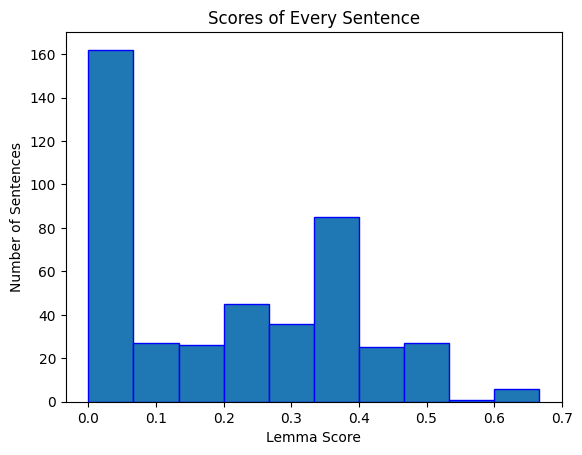

In [28]:
# Get the most common lemmas
lemmas = [token.lemma_.lower() for token in nlp(webpage)
          if not token.is_stop and not token.is_punct and not token.is_space]
lemma_counts = Counter(lemmas)
most_common_lemmas = {lemma for lemma, _ in lemma_counts.most_common(5)}

# Function to score sentences by lemma
def score_by_lemma(sentence, interesting_lemmas):
    words = [token.lemma_.lower() for token in sentence
             if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    matches = sum(1 for word in words if word in interesting_lemmas)
    return matches / len(words)

# Score sentences
doc = nlp(webpage)
sentence_scores = [score_by_lemma(sent, most_common_lemmas) for sent in doc.sents]

# Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='blue')
plt.title("Scores of Every Sentence")
plt.xlabel("Lemma Score")
plt.ylabel("Number of Sentences")
plt.show()

# The most common range is 0.0 to 0.1, but it appears my data is not stored correctly

### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

To do this, you can check the part-of-speech tag by using 'NOUN' and 'PROPN'